                                                  CLUSTERING ANALYSIS 

K-Means and DBSCAN Algorithms :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
xls = pd.ExcelFile("EastWestAirlines.xlsx")
print(xls.sheet_names)


['Description', 'data']


In [6]:
air=pd.read_excel(xls,sheet_name="data")
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Basic Data Exploration :

In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
air.shape

(3999, 12)

In [10]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
air.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Outlier Analysis :

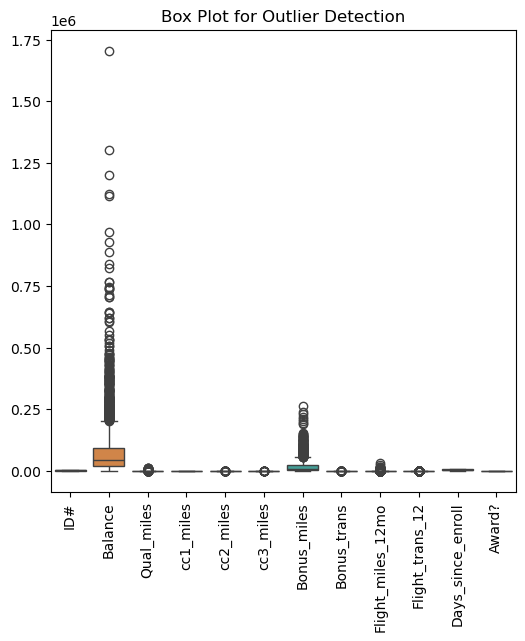

In [13]:
plt.figure(figsize=(6,6))
sns.boxplot(data=air)
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection")
plt.show()


Histogram :

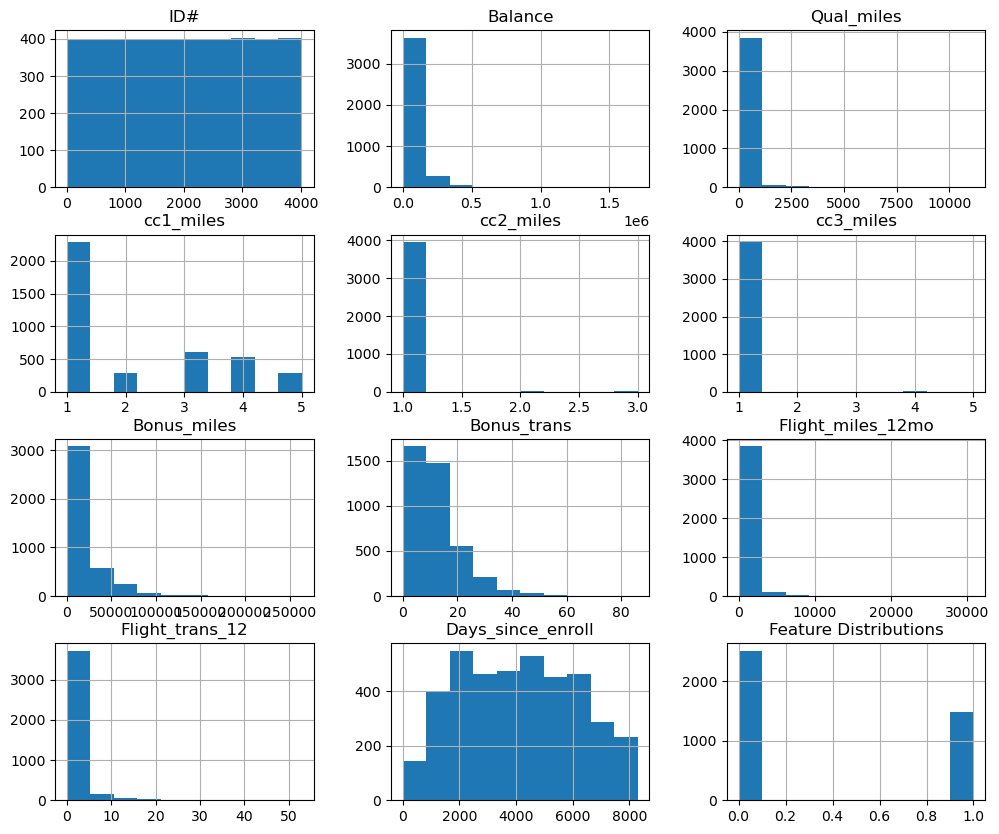

In [14]:
air.hist(figsize=(12,10))
plt.title("Feature Distributions")
plt.show()

Correlation :

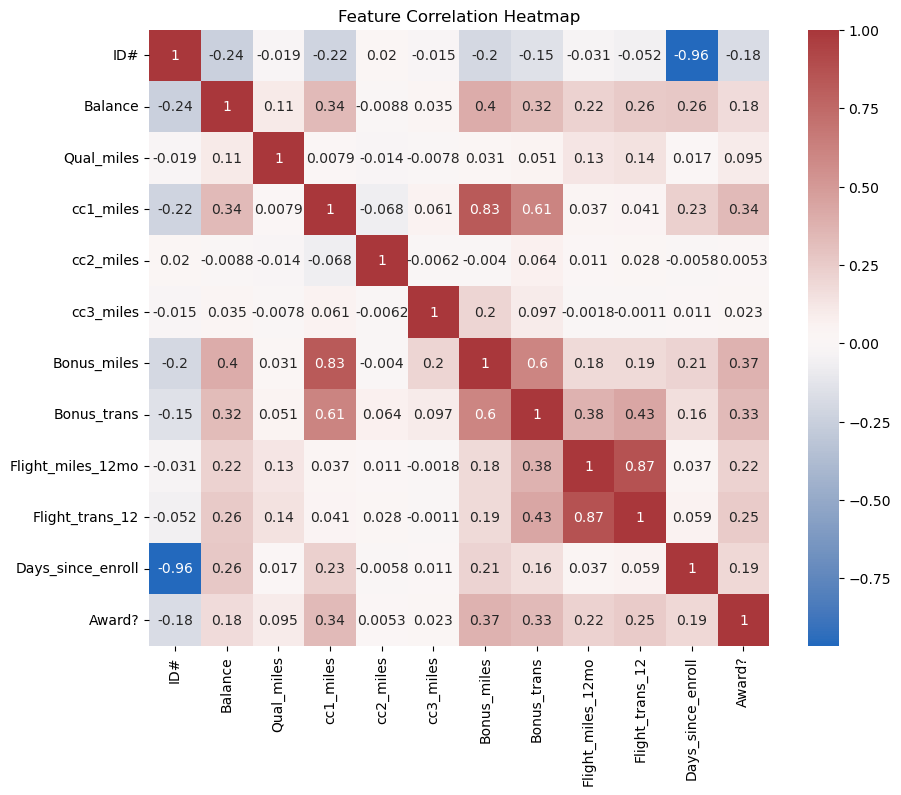

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(air.corr(), annot=True, cmap="vlag")
plt.title("Feature Correlation Heatmap")
plt.show()

Feature Scaling :

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(air)

K-Means Clustering :

Elbow Method :

In [21]:
from sklearn.cluster import KMeans


In [22]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

Visualisation :

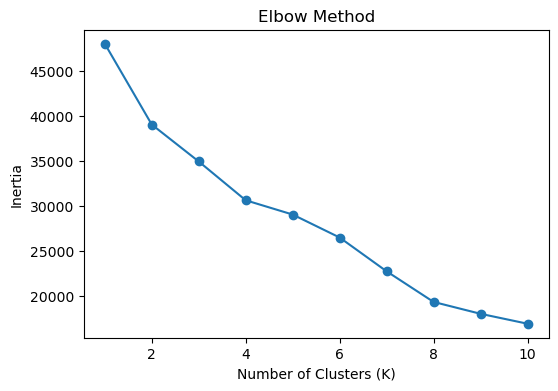

In [23]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Apply K-Means :

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
air["KMeans_Cluster"] = kmeans_labels

In [27]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

Visualisations :

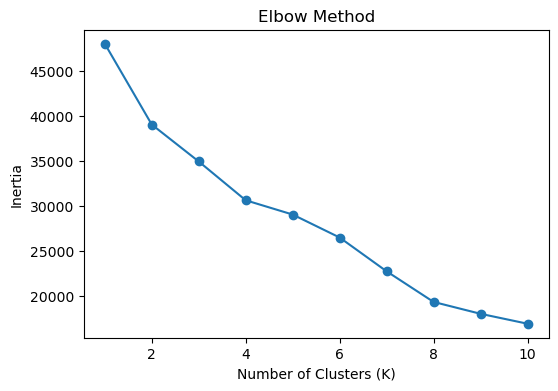

In [28]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


Apply K-Means :

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
air["KMeans_Cluster"] = kmeans_labels


K-Means Visualization :

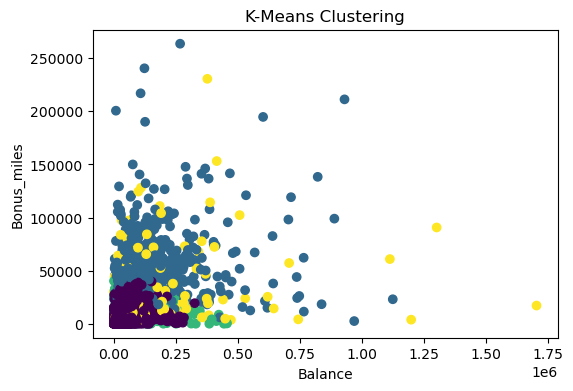

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(air["Balance"], air["Bonus_miles"], c=kmeans_labels, cmap="viridis")
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.title("K-Means Clustering")
plt.show()


K-Means Evaluation :

In [38]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_silhouette


np.float64(0.22808887010836637)

DBSCAN Clustering :

Apply DBSCAN :

In [40]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
air["DBSCAN_Cluster"] = dbscan_labels


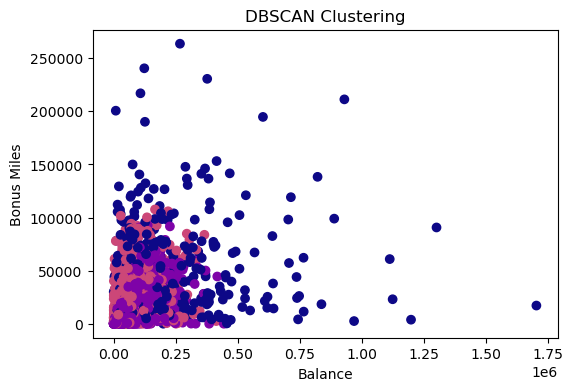

In [41]:
plt.figure(figsize=(6,4))
plt.scatter(air["Balance"], air["Bonus_miles"], c=dbscan_labels, cmap="plasma")
plt.xlabel("Balance")
plt.ylabel("Bonus Miles")
plt.title("DBSCAN Clustering")
plt.show()


In [42]:
mask = dbscan_labels != -1
dbscan_silhouette = silhouette_score(
    scaled_data[mask],
    dbscan_labels[mask]
)
dbscan_silhouette


np.float64(0.23700666640348614)

Cluster Analysis & Interpretation :

In [43]:
#K-Means Clusters :

#Cluster 0: Low mileage, low engagement customers

#Cluster 1: Moderate flyers with consistent activity

#Cluster 2: High mileage & loyal frequent flyers

#Cluster 3: Premium customers with high bonus miles and balance

In [44]:
#DBSCAN Clusters : 

#Identified dense customer groups

#Successfully detected outlier customers

#Sensitive to eps parameter

In [45]:
#Algorithm Comparison :
   # Aspect	                      K-Means	   DBSCAN
    #Requires K	                   Yes        	No
    #Handles Noise	               No	        Yes
    #Cluster Shape	             Spherical	  Arbitrary
    #Silhouette Score	          Higher	    Lower
    #Interpretability	          High	       Moderate

Conclusion :

In [46]:
#K-Means performed better for customer segmentation in this dataset

#DBSCAN is useful for detecting outliers and irregular clusters

#Feature scaling is critical

#Elbow method is effective for selecting K

In [48]:
#Final Outcome :

#Successfully implemented K-Means and DBSCAN clustering on the EastWestAirlines dataset, 
#performed EDA, visualization, tuning, evaluation, and cluster interpretation.